In [1]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

# Load the data
file_path = 'Goodreads_books_with_genres.csv'
data = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Extract relevant columns
genres = data['genres']
ratings = data['average_rating']

# Create sets of genres for each book
genre_lists = [set(str(g).split(';')) if isinstance(g, str) else set() for g in genres]

# Step 3: Calculate Metrics
# Helper function to calculate genre co-occurrences (edges)
def calculate_genre_edges(genre_lists):
    genre_edges = defaultdict(int)
    for genre_list in genre_lists:
        for genre1, genre2 in combinations(genre_list, 2):
            genre_edges[tuple(sorted([genre1, genre2]))] += 1
    return genre_edges

# Calculate edges for the full dataset
genre_edges = calculate_genre_edges(genre_lists)

# Calculate unique genres (nodes)
unique_genres = set().union(*genre_lists)
num_genres = len(unique_genres)
print(num_genres)
# Total edges
total_edges = len(genre_edges)

# Possible edges (nC2)
possible_edges = num_genres * (num_genres - 1) / 2
network_density = total_edges / possible_edges


genre_network = nx.Graph()
for (genre1, genre2), weight in genre_edges.items():
    genre_network.add_edge(genre1, genre2, weight=weight)


# Degree distribution
degree_distribution = [degree for _, degree in genre_network.degree()]

# Edge weight distribution
edge_weights = [data['weight'] for _, _, data in genre_network.edges(data=True)]





# Display key metrics
metrics_summary = {
    "Number of Nodes (Genres)": num_genres,
    "Number of Edges (Genre Pairs)": total_edges,
    "Network Density": network_density,
}
metrics_summary


890


{'Number of Nodes (Genres)': 890,
 'Number of Edges (Genre Pairs)': 27051,
 'Network Density': 0.06837881219903692}

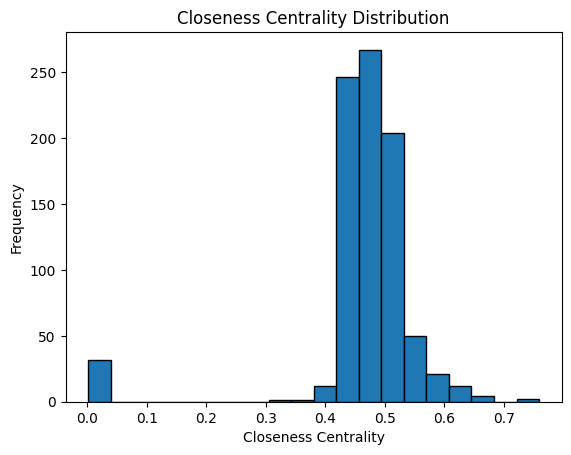

In [2]:
closeness_centrality = nx.closeness_centrality(genre_network)
values = list(closeness_centrality.values())

plt.hist(values, bins=20, edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()


In [4]:
import networkx as nx
import pandas as pd

# Identify the largest connected component
largest_cc = max(nx.connected_components(genre_network), key=len)
largest_cc_subgraph = genre_network.subgraph(largest_cc)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(largest_cc_subgraph, weight='weight')

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(largest_cc_subgraph)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(largest_cc_subgraph, weight='weight')

#Update Nodes File with Metrics (Only for the Largest CC)
node_metrics = []
for genre in largest_cc_subgraph.nodes:
    degree = largest_cc_subgraph.degree(genre)
    weighted_degree = largest_cc_subgraph.degree(genre, weight='weight')
    node_metrics.append({
        'Id': genre,
        'Label': genre,
        'Degree': degree,
        'Weighted Degree': weighted_degree,
        'Betweenness Centrality': betweenness_centrality.get(genre, 0),
        'Closeness Centrality': closeness_centrality.get(genre, 0),
        'Eigenvector Centrality': eigenvector_centrality.get(genre, 0),
    })

# Convert to DataFrame and Save
nodes_df = pd.DataFrame(node_metrics)
nodes_df.to_csv('q1Nodes_largest_cc.csv', index=False)

# Edges: Convert to Gephi-compatible format (Only for the Largest CC)
edges_data = [
    {'Source': genre1, 'Target': genre2, 'Type': 'Undirected', 'Weight': weight}
    for genre1, genre2, weight in largest_cc_subgraph.edges(data='weight')
]
edges_df = pd.DataFrame(edges_data)
edges_df.to_csv('q1Edges_largest_cc.csv', index=False)

print("Edges file for Largest Connected Component saved as 'q1Edges_largest_cc.csv'")

# Calculate additional network metrics for Largest Connected Component
total_nodes = largest_cc_subgraph.number_of_nodes()
edge_count = largest_cc_subgraph.number_of_edges()
density = nx.density(largest_cc_subgraph)

print(f"Network Metrics for Largest Connected Component:")
print(f"Total Nodes: {total_nodes}")
print(f"Total Edges: {edge_count}")
print(f"Network Density: {density}")



Network Metrics for Largest Connected Component:
Total Nodes: 820
Total Edges: 27033
Network Density: 0.08050567318860002


In [5]:
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
for genre, centrality in top_10_betweenness:
    print(f"Genre: {genre}, Betweenness Centrality: {centrality}")

Genre: Reference, Betweenness Centrality: 0.024026259361420766
Genre: Art, Betweenness Centrality: 0.022642179028158925
Genre: Nonfiction, Betweenness Centrality: 0.022527759462646565
Genre: History, Betweenness Centrality: 0.021611288698596704
Genre: Audiobook, Betweenness Centrality: 0.019731167860224812
Genre: Romance, Betweenness Centrality: 0.01869275097043617
Genre: Contemporary, Betweenness Centrality: 0.018622563510375566
Genre: Fiction, Betweenness Centrality: 0.0181638754586519
Genre: Politics, Betweenness Centrality: 0.01632138002675073
Genre: Novels, Betweenness Centrality: 0.015852557176135314


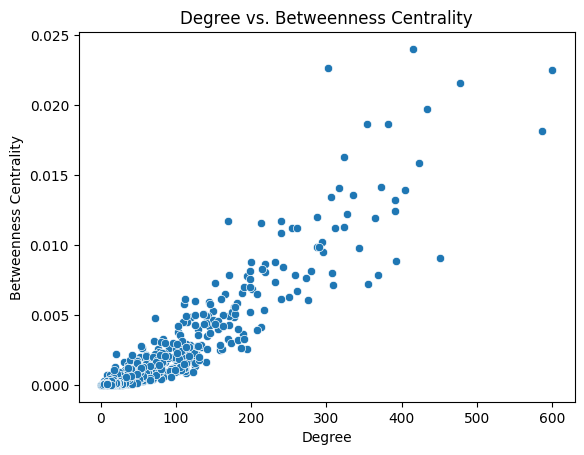

In [3]:
import seaborn as sns

# Assuming nodes_df includes these metrics
sns.scatterplot(data=nodes_df, x='Degree', y='Betweenness Centrality')
plt.title('Degree vs. Betweenness Centrality')
plt.xlabel('Degree')
plt.ylabel('Betweenness Centrality')
plt.show()
